In [1]:
import pandas as pd

In [2]:
a1091 = pd.read_csv('1091.csv')
a1092 = pd.read_csv('1092.csv')
a1093 = pd.read_csv('1093.csv')
a1094 = pd.read_csv('1094.csv')

a1101 = pd.read_csv('1101.csv')
a1102 = pd.read_csv('1102.csv')
a1103 = pd.read_csv('1103.csv')
a1104 = pd.read_csv('1104.csv')

a1111 = pd.read_csv('1111.csv')
a1112 = pd.read_csv('1112.csv')
a1113 = pd.read_csv('1113.csv')
a1114 = pd.read_csv('1114.csv')

a1121 = pd.read_csv('1121.csv')
a1122 = pd.read_csv('1122.csv')
a1123 = pd.read_csv('1123.csv')
a1124 = pd.read_csv('1124.csv')

df = pd.concat([a1091,a1092,a1093,a1094,
                a1101,a1102,a1103,a1104,
                a1111,a1112,a1113,a1114,
                a1121,a1122,a1123,a1124])

C:\Users\asd00\AppData\Local\Temp\ipykernel_28068\2000194068.py:3: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25,28,29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  a1093 = pd.read_csv('1093.csv')
C:\Users\asd00\AppData\Local\Temp\ipykernel_28068\2000194068.py:4: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25,28,29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  a1094 = pd.read_csv('1094.csv')


In [3]:
# 查看訓練集、驗證集原始資料長度
q = pd.concat([a1091,a1092,a1093,a1094,
                a1101,a1102,a1103,a1104,
                a1111,a1112,a1113,a1114])
p = pd.concat([a1121, a1122, a1123,a1124])

print(len(q),len(p))

168550 50362


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218912 entries, 0 to 13141
Data columns (total 33 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   鄉鎮市區         218872 non-null  object
 1   交易標的         218912 non-null  object
 2   土地位置建物門牌     218912 non-null  object
 3   土地移轉總面積平方公尺  218912 non-null  object
 4   都市土地使用分區     186881 non-null  object
 5   非都市土地使用分區    21293 non-null   object
 6   非都市土地使用編定    21279 non-null   object
 7   交易年月日        218912 non-null  object
 8   交易筆棟數        218912 non-null  object
 9   移轉層次         175953 non-null  object
 10  總樓層數         175749 non-null  object
 11  建物型態         218912 non-null  object
 12  主要用途         175823 non-null  object
 13  主要建材         175765 non-null  object
 14  建築完成年月       175219 non-null  object
 15  建物移轉總面積平方公尺  218912 non-null  object
 16  建物現況格局-房     218912 non-null  object
 17  建物現況格局-廳     218912 non-null  object
 18  建物現況格局-衛     218912 non-null  object
 19  建物現況格局-隔

In [5]:
# 第0列為英文欄位名稱，故刪除資料第0列
df = df.drop(0,axis=0)

In [6]:
# 要過濾掉總價元是0的資料，由於該欄位為字串型態，先將轉為浮點數(以便後續計算)，再過濾掉為0的資料
df['總價元'] = df['總價元'].astype(float)
df = df[df['總價元'] != 0]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218829 entries, 1 to 13141
Data columns (total 33 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   鄉鎮市區         218789 non-null  object 
 1   交易標的         218829 non-null  object 
 2   土地位置建物門牌     218829 non-null  object 
 3   土地移轉總面積平方公尺  218829 non-null  object 
 4   都市土地使用分區     186798 non-null  object 
 5   非都市土地使用分區    21277 non-null   object 
 6   非都市土地使用編定    21263 non-null   object 
 7   交易年月日        218829 non-null  object 
 8   交易筆棟數        218829 non-null  object 
 9   移轉層次         175929 non-null  object 
 10  總樓層數         175725 non-null  object 
 11  建物型態         218829 non-null  object 
 12  主要用途         175799 non-null  object 
 13  主要建材         175741 non-null  object 
 14  建築完成年月       175196 non-null  object 
 15  建物移轉總面積平方公尺  218829 non-null  object 
 16  建物現況格局-房     218829 non-null  object 
 17  建物現況格局-廳     218829 non-null  object 
 18  建物現況格局-衛     218829 non-null  

In [8]:
df.dropna(subset=['交易年月日','建築完成年月'], inplace=True)

In [9]:
import re
def is_valid_date(date_str):
  date_pattern = r'^\d{6,7}$'
  return bool(re.match(date_pattern, date_str))

In [10]:
df['建築完成年月'] = df['建築完成年月'].astype(str)
df['交易年月日'] = df['交易年月日'].astype(str)
df = df[df['建築完成年月'].apply(is_valid_date)]
df = df[df['交易年月日'].apply(is_valid_date)]

In [11]:
df['建築完成年月'] = df['建築完成年月'].apply(lambda x: pd.to_datetime(str(int(x) + 19110000), format='%Y%m%d', errors='coerce'))
df['交易年月日'] = df['交易年月日'].apply(lambda x: pd.to_datetime(str(int(x) + 19110000), format='%Y%m%d', errors='coerce'))

In [12]:
train_start = '2020-01-01'
train_end= '2022-12-31'

df1 = df[(df['交易年月日'] >= train_start) & (df['交易年月日'] <= train_end)]

In [13]:
valid_start = '2023-01-01'
valid_end = '2023-12-31'

df2 = df[(df['交易年月日'] >= valid_start) & (df['交易年月日'] <= valid_end)]

In [14]:
df1.info(), df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115664 entries, 1 to 12743
Data columns (total 33 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   鄉鎮市區         115664 non-null  object        
 1   交易標的         115664 non-null  object        
 2   土地位置建物門牌     115664 non-null  object        
 3   土地移轉總面積平方公尺  115664 non-null  object        
 4   都市土地使用分區     104079 non-null  object        
 5   非都市土地使用分區    7237 non-null    object        
 6   非都市土地使用編定    7233 non-null    object        
 7   交易年月日        115664 non-null  datetime64[ns]
 8   交易筆棟數        115664 non-null  object        
 9   移轉層次         115663 non-null  object        
 10  總樓層數         115640 non-null  object        
 11  建物型態         115664 non-null  object        
 12  主要用途         115655 non-null  object        
 13  主要建材         115658 non-null  object        
 14  建築完成年月       115487 non-null  datetime64[ns]
 15  建物移轉總面積平方公尺  115664 non-null  object    

(None, None)

In [15]:
# 刪除重複的值
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()

In [16]:
# 將 '都市土地使用分區' 分類成 '住','商','農','工','其他'
mapping = {'住':'住','商':'商','農':'農','工':'工'}
df1['都市土地使用分區'] = df1['都市土地使用分區'].map(mapping)
df1['都市土地使用分區'].fillna('其他', inplace=True)

df2['都市土地使用分區'] = df2['都市土地使用分區'].map(mapping)
df2['都市土地使用分區'].fillna('其他', inplace=True)

In [17]:
# check
df1['都市土地使用分區'].unique(), df2['都市土地使用分區'].unique()

(array(['住', '商', '其他', '農', '工'], dtype=object),
 array(['住', '其他', '商', '農', '工'], dtype=object))

In [18]:
# 刪除土地交易，因為搜尋不到經緯度，不便後續進行
df1 = df1[df1['交易標的'] != '土地']
df2 = df2[df2['交易標的'] != '土地']

In [19]:
# 將交易筆棟數拆分成土地 & 建物 & 車位數量
df1['土地數量'] = df1['交易筆棟數'].str.extract(r'土地(\d+)')[0].astype(int)
df1['建物數量'] = df1['交易筆棟數'].str.extract(r'建物(\d+)')[0].astype(int)
df1['車位數量'] = df1['交易筆棟數'].str.extract(r'車位(\d+)')[0].astype(int)

df2['土地數量'] = df2['交易筆棟數'].str.extract(r'土地(\d+)')[0].astype(int)
df2['建物數量'] = df2['交易筆棟數'].str.extract(r'建物(\d+)')[0].astype(int)
df2['車位數量'] = df2['交易筆棟數'].str.extract(r'車位(\d+)')[0].astype(int)

In [20]:
#check
k=7
df1['土地數量'].iloc[k], df1['建物數量'].iloc[k], df1['車位數量'].iloc[k],df1['交易筆棟數'].iloc[k]

(1, 1, 0, '土地1建物1車位0')

In [21]:
df1.info(),df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115553 entries, 1 to 12743
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   鄉鎮市區         115553 non-null  object        
 1   交易標的         115553 non-null  object        
 2   土地位置建物門牌     115553 non-null  object        
 3   土地移轉總面積平方公尺  115553 non-null  object        
 4   都市土地使用分區     115553 non-null  object        
 5   非都市土地使用分區    7211 non-null    object        
 6   非都市土地使用編定    7207 non-null    object        
 7   交易年月日        115553 non-null  datetime64[ns]
 8   交易筆棟數        115553 non-null  object        
 9   移轉層次         115552 non-null  object        
 10  總樓層數         115529 non-null  object        
 11  建物型態         115553 non-null  object        
 12  主要用途         115544 non-null  object        
 13  主要建材         115547 non-null  object        
 14  建築完成年月       115376 non-null  datetime64[ns]
 15  建物移轉總面積平方公尺  115553 non-null  object    

(None, None)

In [ ]:
df1['主要用途']

In [27]:
# 過濾掉不是 '住家用' 之主要用途
df1 = df1[df1['主要用途'] == '住家用']
df2 = df2[df2['主要用途'] == '住家用']

In [28]:
# 先刪除對資料預測沒影響或太多空白值的變數
# 因車位類別遺失值過多，故不考慮有關車位之欄位
# 交易標的與交易筆棟數重複
# 交易筆棟數已完成分割，故刪除
# 主要用途已過濾成住家用，故刪除
df1 = df1.drop(['非都市土地使用分區','非都市土地使用編定','交易標的','交易筆棟數',
               '單價元平方公尺','備註','編號','電梯','車位類別','車位移轉總面積平方公尺','車位總價元','移轉編號','主要用途','車位數量'],axis=1)

df2 = df2.drop(['非都市土地使用分區','非都市土地使用編定','交易標的','交易筆棟數',
               '單價元平方公尺','備註','編號','電梯','車位類別','車位移轉總面積平方公尺','車位總價元','移轉編號','主要用途','車位數量'],axis=1)

In [29]:
# 導入人口數據，跳過空行
population111 = pd.read_csv('臺中市111人口.csv',skiprows=[0])
population112 = pd.read_csv('臺中市112人口.csv',skiprows=[0])

# 預先扣除該資料總人口數 再運算一次
population111 = population111[['區域別','總計']][1:]
population112 = population112[['區域別','總計']][1:]

In [30]:
# 計算總人口數與平均
t1, t2 = population111['總計'].to_list(), population112['總計'].to_list()
t1, t2 = [int(i.replace(',', '').strip()) for i in t1], [int(j.replace(',', '').strip()) for j in t2]
avg1, avg2 = sum(t1)//len(t1), sum(t2)//len(t2)
avg1, avg2

(97050, 98134)

In [31]:
sum(t1), sum(t2)

(2814459, 2845909)

In [32]:
# 先處理總計部分的空白元素
population111['總計'] = population111['總計'].str.replace(',', '').astype(int)
population112['總計'] = population112['總計'].str.replace(',', '').astype(int)

# 再依總人口數又大到小排列
sorted_population111 = population111.sort_values(by='總計',ascending=False)
sorted_population112 = population112.sort_values(by='總計',ascending=False)

In [33]:
# check
print(sorted_population111)
print()
print(sorted_population112)

    區域別      總計
8   北屯區  295677
6   西屯區  231866
28  大里區  211469
27  太平區  196011
7   南屯區  177930
9   豐原區  163476
5    北區  142778
3    南區  125466
4    西區  112278
17  潭子區  108639
13  沙鹿區   97002
18  大雅區   95275
12  清水區   88947
23  烏日區   78122
25  龍井區   77887
2    東區   75554
11  大甲區   74737
16  神岡區   64308
26  霧峰區   64091
14  梧棲區   59848
24  大肚區   56129
15  后里區   53667
10  東勢區   47817
21  外埔區   31264
19  新社區   23283
22  大安區   18230
1    中區   17635
20  石岡區   14154
29  和平區   10919

    區域別      總計
8   北屯區  304179
6   西屯區  235441
28  大里區  212511
27  太平區  198212
7   南屯區  182232
9   豐原區  163948
5    北區  144097
3    南區  126907
4    西區  113548
17  潭子區  108979
13  沙鹿區   98805
18  大雅區   95708
12  清水區   89924
23  烏日區   80194
25  龍井區   78413
2    東區   76852
11  大甲區   74684
16  神岡區   64362
26  霧峰區   63822
14  梧棲區   61019
24  大肚區   55955
15  后里區   53653
10  東勢區   47468
21  外埔區   31163
19  新社區   23089
22  大安區   18073
1    中區   17784
20  石岡區   14093
29  和平區   10794


In [34]:
# 將大於平均數的行政區取出
top_population111 = sorted_population111[sorted_population111['總計'] >= avg1]
new_population111 = top_population111['區域別'].tolist()

top_population112 = sorted_population112[sorted_population112['總計'] >= avg1]
new_population112 = top_population112['區域別'].tolist()

print(new_population111)
print()
print(new_population112)

['北屯區', '西屯區', '大里區', '太平區', '南屯區', '豐原區', '北區', '南區', '西區', '潭子區']

['北屯區', '西屯區', '大里區', '太平區', '南屯區', '豐原區', '北區', '南區', '西區', '潭子區', '沙鹿區']


In [35]:
# 將地址統一為 '臺中市' + XXXXXXXXXXXXXXX
def replace_missing_district(row):
    if row['鄉鎮市區'] not in row['土地位置建物門牌']:
        row['土地位置建物門牌'] = '臺中市' + row['鄉鎮市區'] + row['土地位置建物門牌']
    return row

In [36]:
df1['鄉鎮市區'] = df1['鄉鎮市區'].astype(str)
df1['土地位置建物門牌'] = df1['土地位置建物門牌'].astype(str)
df1 = df1.apply(replace_missing_district, axis=1)
df1['鄉鎮市區'] = df1['鄉鎮市區'].str.replace('台中市', '臺中市')

df2['鄉鎮市區'] = df2['鄉鎮市區'].astype(str)
df2['土地位置建物門牌'] = df2['土地位置建物門牌'].astype(str)
df2 = df2.apply(replace_missing_district, axis=1)
df2['鄉鎮市區'] = df2['鄉鎮市區'].str.replace('台中市', '臺中市')

In [37]:
df1['鄉鎮市區'] = df1['鄉鎮市區'].apply(lambda x:x if x in new_population111 else '其他')
df2['鄉鎮市區'] = df2['鄉鎮市區'].apply(lambda y:y if y in new_population112 else '其他')

In [38]:
# 將'其他'新增至 大於平均的行政區中
new_population111.append('其他')

# 建立一個分類器
cat_dtype111 = pd.CategoricalDtype(categories=new_population111, ordered=True)

# 將原資料依人口數由大到小排列
df1['鄉鎮市區'] = df1['鄉鎮市區'].astype(cat_dtype111)
df1 = df1.sort_values(by='鄉鎮市區')

In [39]:
# 將'其他'新增至 大於平均的行政區中
new_population112.append('其他')

# 建立一個分類器
cat_dtype112 = pd.CategoricalDtype(categories=new_population112, ordered=True)

# 將原資料依人口數由大到小排列
df2['鄉鎮市區'] = df2['鄉鎮市區'].astype(cat_dtype112)
df2 = df2.sort_values(by='鄉鎮市區')

In [40]:
# check
df1.info(), df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99802 entries, 1547 to 1
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   鄉鎮市區         99802 non-null  category      
 1   土地位置建物門牌     99802 non-null  object        
 2   土地移轉總面積平方公尺  99802 non-null  object        
 3   都市土地使用分區     99802 non-null  object        
 4   交易年月日        99802 non-null  datetime64[ns]
 5   移轉層次         99802 non-null  object        
 6   總樓層數         99795 non-null  object        
 7   建物型態         99802 non-null  object        
 8   主要建材         99798 non-null  object        
 9   建築完成年月       99675 non-null  datetime64[ns]
 10  建物移轉總面積平方公尺  99802 non-null  object        
 11  建物現況格局-房     99802 non-null  object        
 12  建物現況格局-廳     99802 non-null  object        
 13  建物現況格局-衛     99802 non-null  object        
 14  建物現況格局-隔間    99802 non-null  object        
 15  有無管理組織       99802 non-null  object        
 16  總價元       

(None, None)

In [41]:
df1['交易年月日'] = pd.to_datetime(df1['交易年月日'])
df1['建築完成年月'] = pd.to_datetime(df1['建築完成年月'])

df2['交易年月日'] = pd.to_datetime(df2['交易年月日'])
df2['建築完成年月'] = pd.to_datetime(df2['建築完成年月'])

# 新增一筆欄位'屋齡' 以年為單位,並取到小數點第一位
df1['屋齡'] = ((df1['交易年月日'] - df1['建築完成年月']).dt.days / 365.0).round(1)
df2['屋齡'] = ((df2['交易年月日'] - df2['建築完成年月']).dt.days / 365.0).round(1)

In [42]:
# 發現有負值，可能表示是預售屋，於是將所有負值的欄位刪除
df1 = df1[df1['屋齡'] >= 0]

df2 = df2[df2['屋齡'] >= 0]

In [43]:
# 處理 '總樓層數' 的值 , 如果是nan，(空白)，見其他登記事項 先替換成0, 之後經緯度座標轉換完成會刪除
df1['總樓層數'].fillna(0, inplace=True)
df2['總樓層數'].fillna(0, inplace=True)

In [44]:
# 將'總樓層數' 替換成數字
chinese_numbers = {
    '一': 1,
    '二': 2,
    '三': 3,
    '四': 4,
    '五': 5,
    '六': 6,
    '七': 7,
    '八': 8,
    '九': 9,
    '十': 10
}
def chinese_to_number(chinese_str):
  if chinese_str == '見其他登記事項':
    return 0
  elif chinese_str == '(空白)':
    return 0
  elif chinese_str == 0:
    pass
  else:
    if '層' in chinese_str:
      chinese_str = chinese_str.replace('層','')
    if len(chinese_str) == 1:
      return chinese_numbers[chinese_str]
    if len(chinese_str) == 2:
      if chinese_str[0] == '十':
        chinese_str_1 = chinese_numbers[chinese_str[1]]
        return 10 + chinese_str_1
      elif chinese_str[1] == '十':
        chinese_str_0 = chinese_numbers[chinese_str[0]]
        return 10*chinese_str_0
    elif len(chinese_str) == 3:
        return chinese_numbers[chinese_str[0]]*10 + chinese_numbers[chinese_str[-1]]
    
df1['總樓層數'] = df1['總樓層數'].apply(chinese_to_number)
df2['總樓層數'] = df2['總樓層數'].apply(chinese_to_number)

In [45]:
# 如果是 nan 先補 0 ，再將總樓層數的值轉為整數型態
df1['總樓層數'].fillna(0, inplace=True)
df1['總樓層數'] = df1['總樓層數'].astype(int)

df2['總樓層數'].fillna(0, inplace=True)
df2['總樓層數'] = df2['總樓層數'].astype(int)

In [46]:
# 如果移轉層次是 '全' ，代表移轉整棟=總樓層數 ，所以將 '全' 替換成 '總樓層數' 的值
df1['移轉層次'] = df1.apply(lambda row: row['總樓層數'] if row['移轉層次'] == '全' else row['移轉層次'], axis=1)

df2['移轉層次'] = df2.apply(lambda row: row['總樓層數'] if row['移轉層次'] == '全' else row['移轉層次'], axis=1)

In [47]:
# 移轉層次處理，如果移轉層次裡有 keywords_to_ignore 的值，將其刪除不做考慮，但仍保留該值去計算層次
# 先判斷其值是否為數字，是則直接回傳其整數，否則計算移轉了幾層
keywords_to_ignore = ['屋頂突出物', '電梯樓梯間', '夾層', '見其他登記事項', '騎樓', '防空避難室']
df1['移轉層次'] = df1['移轉層次'].fillna(0)
df2['移轉層次'] = df2['移轉層次'].fillna(0)

def calculate_floor_count(entry):
  entry = str(entry)
  if entry.isdigit():
    return int(entry)
  else:
    for i in keywords_to_ignore:
      if i in entry:
        entry = entry.replace(i,'')
  entry = entry.split('，')
  return len(entry)

df1['移轉層次'] = df1['移轉層次'].fillna(0)
df1['移轉層次'] = df1['移轉層次'].apply(calculate_floor_count)

df2['移轉層次'] = df2['移轉層次'].fillna(0)
df2['移轉層次'] = df2['移轉層次'].apply(calculate_floor_count)

In [50]:
# 將數量少於'其他'的項目都貴類成 '其他'
value_counts = df1['建物型態'].value_counts()
threshold = value_counts['其他']
df1['建物型態'] = df1['建物型態'].apply(lambda x : x if value_counts[x] >= threshold else '其他')

In [52]:
# 將數量少於'其他'的項目都貴類成 '其他'
value_counts = df2['建物型態'].value_counts()
threshold = value_counts['其他']
df2['建物型態'] = df2['建物型態'].apply(lambda x : x if value_counts[x] >= threshold else '其他')

In [45]:
df1['主要建材'].value_counts(), df2['主要建材'].value_counts()

(主要建材
 鋼筋混凝土造                 67305
 加強磚造                    3532
 鋼骨鋼筋混凝土造                1134
 見其他登記事項                  856
 鋼筋混凝土加強磚造                580
                        ...  
 鋼磚地床、磨石地床、水泥平頂、加強磚造        1
 加強磚造、水泥平頂、水泥地床、瓦頂          1
 加強磚造、木石磚造                  1
 加強磚造、水泥地床、、水泥平頂            1
 加強磚造RC                     1
 Name: count, Length: 112, dtype: int64,
 主要建材
 鋼筋混凝土造                   15731
 加強磚造                       813
 鋼骨鋼筋混凝土造                   222
 鋼筋混凝土加強磚造                  134
 ＲＣ造                         87
 鋼骨造                         72
 見其他登記事項                     67
 磚造                          38
 鐵筋加強磚造                      35
 ＲＣ鋼筋混凝土造                    18
 鐵筋磚造蓋瓦頂                     10
 加強磚造、水泥平頂、磨石地床               7
 鋼造                           5
 鋼骨混凝土造                       4
 ＲＣ造、鋼骨造                      4
 磚造蓋瓦頂                        3
 加強磚造、水泥平頂、水泥地床               3
 鋼骨鋼筋混凝土造，鋼筋混凝土造，鋼骨造          3
 鋼骨造，鋼筋混凝土造                   3
 Ｒ‧Ｃ鋼筋混凝土

In [54]:
# 要保留的主要建材類別列表
keep = ['鋼筋混凝土造', '加強磚造', '鋼骨鋼筋混凝土造', '鋼筋混凝土加強磚造']

def transform_material(material):
    if material in keep:
        return material
    else:
        return '其他'

In [55]:
df1['主要建材'] = df1['主要建材'].apply(transform_material)
df2['主要建材'] = df2['主要建材'].apply(transform_material)

In [57]:
#check
df1['主要建材'].value_counts(), df2['主要建材'].value_counts()

(主要建材
 鋼筋混凝土造       67305
 加強磚造          3532
 其他            2116
 鋼骨鋼筋混凝土造      1134
 鋼筋混凝土加強磚造      580
 Name: count, dtype: int64,
 主要建材
 鋼筋混凝土造       15731
 加強磚造           813
 其他             409
 鋼骨鋼筋混凝土造       222
 鋼筋混凝土加強磚造      134
 Name: count, dtype: int64)

In [58]:
def frequency_encode(column):
    # 計算每個類別的頻率
    category_frequency = column.value_counts()
    # 將值映射到其頻率
    encoded_column = column.map(category_frequency)
    # 轉為整數型態
    encoded_column = encoded_column.astype(int)
    return encoded_column

In [60]:
df1['有無管理組織'].value_counts()

有無管理組織
有    53820
無    20847
Name: count, dtype: int64

In [51]:
df1['都市土地使用分區'] = frequency_encode(df1['都市土地使用分區'])
df1['有無管理組織'] = frequency_encode(df1['有無管理組織'])
df1['建物現況格局-隔間'] = frequency_encode(df1['建物現況格局-隔間'])
df1['建物型態'] = frequency_encode(df1['建物型態'])
df1['主要建材'] = frequency_encode(df1['主要建材'])

In [52]:
df2['都市土地使用分區'] = frequency_encode(df2['都市土地使用分區'])
df2['有無管理組織'] = frequency_encode(df2['有無管理組織'])
df2['建物現況格局-隔間'] = frequency_encode(df2['建物現況格局-隔間'])
df2['建物型態'] = frequency_encode(df2['建物型態'])
df2['主要建材'] = frequency_encode(df2['主要建材'])

In [53]:
# 確保資料型態為整數或浮點數，才能進行後續的運算
df1['建物移轉總面積平方公尺'] = df1['建物移轉總面積平方公尺'].astype(float)
df1['土地移轉總面積平方公尺'] = df1['土地移轉總面積平方公尺'].astype(float)
df1['主建物面積'] = df1['主建物面積'].astype(float)
df1['附屬建物面積'] = df1['附屬建物面積'].astype(float)
df1['陽台面積'] = df1['陽台面積'].astype(float)

df2['建物移轉總面積平方公尺'] = df2['建物移轉總面積平方公尺'].astype(float)
df2['土地移轉總面積平方公尺'] = df2['土地移轉總面積平方公尺'].astype(float)
df2['主建物面積'] = df2['主建物面積'].astype(float)
df2['附屬建物面積'] = df2['附屬建物面積'].astype(float)
df2['陽台面積'] = df2['陽台面積'].astype(float)

In [54]:
def div_price(price):
  return price/10000

df1['總價元'] = df1['總價元'].apply(div_price)

df2['總價元'] = df2['總價元'].apply(div_price)

In [55]:
# 把平方公尺轉為坪數，並更名
def area_trans(area):
    return round(area*0.3025,2)

df1['土地移轉總面積平方公尺'] = df1['土地移轉總面積平方公尺'].apply(area_trans)
df1['建物移轉總面積平方公尺'] = df1['建物移轉總面積平方公尺'].apply(area_trans)
df1['主建物面積'] = df1['主建物面積'].apply(area_trans)
df1['附屬建物面積'] = df1['附屬建物面積'].apply(area_trans)
df1['陽台面積'] = df1['陽台面積'].apply(area_trans)

df2['土地移轉總面積平方公尺'] = df2['土地移轉總面積平方公尺'].apply(area_trans)
df2['建物移轉總面積平方公尺'] = df2['建物移轉總面積平方公尺'].apply(area_trans)
df2['主建物面積'] = df2['主建物面積'].apply(area_trans)
df2['附屬建物面積'] = df2['附屬建物面積'].apply(area_trans)
df2['陽台面積'] = df2['陽台面積'].apply(area_trans)

df1 = df1.rename(columns={'土地移轉總面積平方公尺':'土地移轉總坪數',
                       '建物移轉總面積平方公尺':'建物移轉總坪數',
                       '主建物面積':'主建物坪數',
                       '附屬建物面積':'附屬建物坪數',
                       '陽台面積':'陽台坪數'})

df2 = df2.rename(columns={'土地移轉總面積平方公尺':'土地移轉總坪數',
                       '建物移轉總面積平方公尺':'建物移轉總坪數',
                       '主建物面積':'主建物坪數',
                       '附屬建物面積':'附屬建物坪數',
                       '陽台面積':'陽台坪數'})

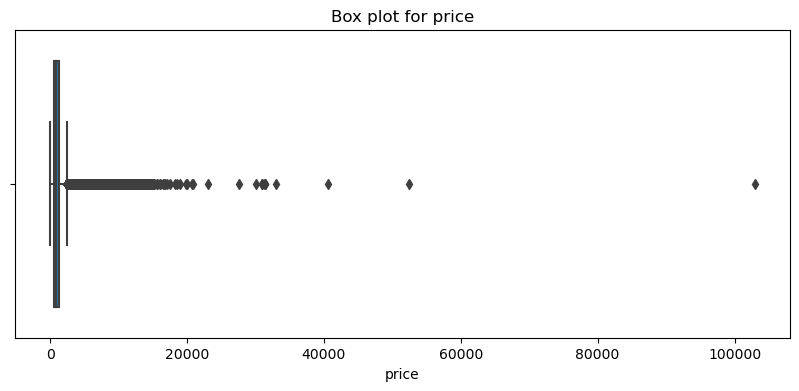

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.boxplot(x=df1['總價元'])
plt.title('Box plot for price')
plt.xlabel('price')
plt.show()

In [57]:
for i in range(8):
    Q1 = df1['總價元'].quantile(0.25)
    Q3 = df1['總價元'].quantile(0.75)
    IQR = Q3 - Q1
    lowerbound = Q1 - 1.5*IQR
    upperbound = Q3 + 1.5*IQR
    df1 = df1[(df1['總價元'] >= lowerbound) & (df1['總價元'] <= upperbound)]

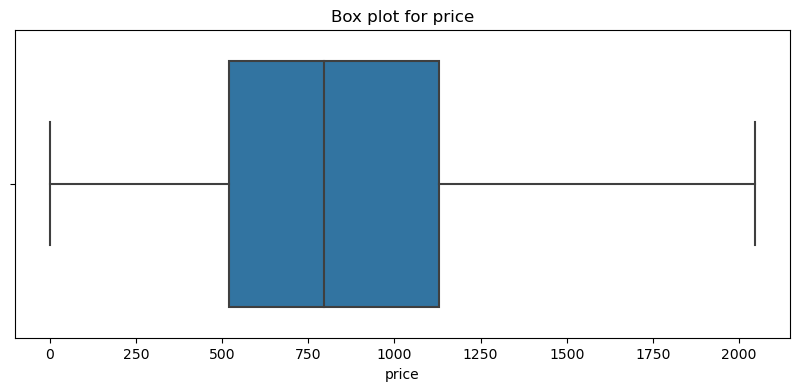

In [58]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df1['總價元'])
plt.title('Box plot for price')
plt.xlabel('price')
plt.show()

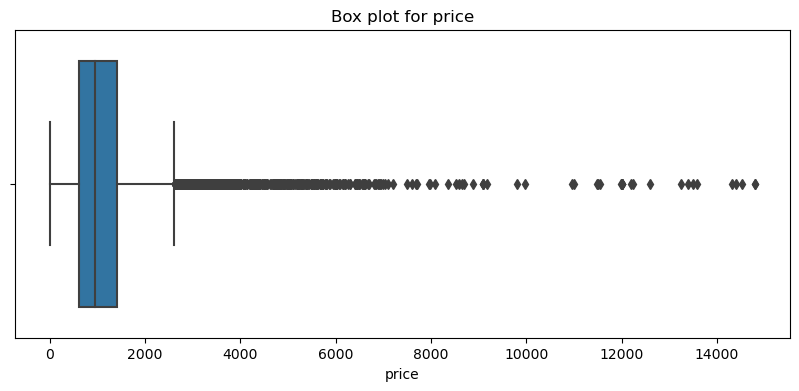

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.boxplot(x=df2['總價元'])
plt.title('Box plot for price')
plt.xlabel('price')
plt.show()

In [60]:
for i in range(3):
    Q1 = df2['總價元'].quantile(0.25)
    Q3 = df2['總價元'].quantile(0.75)
    IQR = Q3 - Q1
    lowerbound = Q1 - 1.5*IQR
    upperbound = Q3 + 1.5*IQR
    df2 = df2[(df2['總價元'] >= lowerbound) & (df2['總價元'] <= upperbound)]

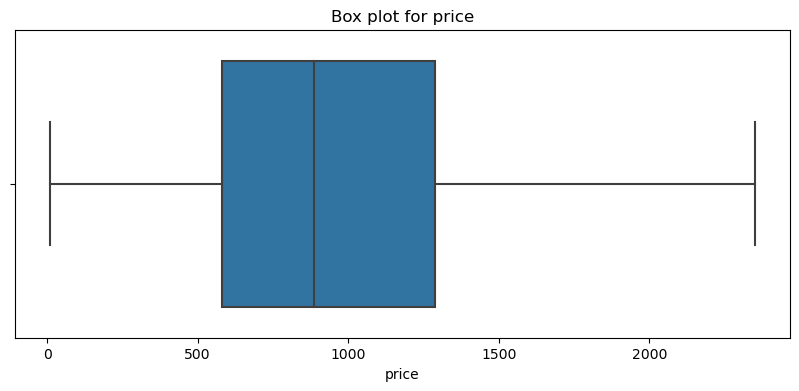

In [61]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df2['總價元'])
plt.title('Box plot for price')
plt.xlabel('price')
plt.show()

In [62]:
df1['鄉鎮市區'].value_counts()

鄉鎮市區
其他     15310
北屯區     9741
西屯區     9180
北區      6474
南屯區     4792
太平區     4555
南區      4471
大里區     4306
西區      3653
豐原區     2110
潭子區     1887
Name: count, dtype: int64

In [63]:
df1['鄉鎮市區'] = df1['鄉鎮市區'].map({'北屯區':10,'西屯區':9,'北區':8,'南屯區':7,'太平區':6,'南區':5,
                                      '大里區':4,'西區':3,'豐原區':2,'潭子區':1,'其他':0})
df1['鄉鎮市區'] = df1['鄉鎮市區'].astype(int)

In [64]:
df2['鄉鎮市區'].value_counts()

鄉鎮市區
其他     3265
北屯區    2525
西屯區    2055
北區     1674
南屯區    1187
南區     1172
太平區     981
西區      911
大里區     731
豐原區     535
沙鹿區     461
潭子區     419
Name: count, dtype: int64

In [65]:
df2['鄉鎮市區'] = df2['鄉鎮市區'].map({'北屯區':11,'西屯區':10,'北區':9,'南屯區':8,'南區':7,'太平區':6,
                                    '西區':5,'大里區':4,'豐原區':3,'沙鹿區':2,'潭子區':1,'其他':0})
df2['鄉鎮市區'] = df2['鄉鎮市區'].astype(int)

In [66]:
ec = pd.read_csv('市場.csv')

In [67]:
ec[['year', 'month']] = ec['時間'].str.split('/', expand=True)
ec['year'] = (ec['year'].astype(int) + 1911).astype(str)
ec['new_date'] = ec['year'] + '-' + ec['month']
ec = ec.drop(['year','month','時間'],axis=1)

In [68]:
def string_trans(string):
    string = str(string)
    return string[:7]

In [69]:
df1['new_date'], df2['new_date'] = 0, 0
df1['new_date'] = df1['交易年月日'].apply(string_trans)
df2['new_date'] = df2['交易年月日'].apply(string_trans)

In [70]:
df1 = pd.merge(df1, ec[['new_date', '五大行庫平均房貸利率(%)', '消費者物價指數', 'M1b貨幣供給額(億元)','經濟成長率(%)']],
                    left_on='new_date', right_on='new_date', how='left')

In [71]:
df2 = pd.merge(df2, ec[['new_date', '五大行庫平均房貸利率(%)', '消費者物價指數', 'M1b貨幣供給額(億元)','經濟成長率(%)']],
                    left_on='new_date', right_on='new_date', how='left')

In [72]:
dt1 = pd.read_excel('df105360.xlsx')
df_loc = pd.read_excel('111地標_final.xlsx')
dt2 = pd.read_excel('validaddresscoord2.xlsx')

In [73]:
def check(string):
    if '\r' in string:
        return string.replace('\r','')
    elif '\n' in string:
        return string.replace('\n','')
    elif '_x000D_' in string:
        return string.replace('_x000D_','')
    else:
        return string
dt1['address'] = dt1['address'].apply(check)
dt2['address'] = dt2['address'].apply(check)

In [74]:
dt1 = dt1.drop_duplicates(subset='address', keep='first')
dt2 = dt2.drop_duplicates(subset='address', keep='first')

In [75]:
df1 = df1.merge(dt1[['address', 'longitude', 'latitude']], left_on='土地位置建物門牌', right_on='address', how='left')
df2 = df2.merge(dt2[['address', 'longitude', 'latitude']], left_on='土地位置建物門牌', right_on='address', how='left')

In [76]:
df1.info(),df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66479 entries, 0 to 66478
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   鄉鎮市區           66479 non-null  int32         
 1   土地位置建物門牌       66479 non-null  object        
 2   土地移轉總坪數        66479 non-null  float64       
 3   都市土地使用分區       66479 non-null  int32         
 4   交易年月日          66479 non-null  datetime64[ns]
 5   移轉層次           66479 non-null  int64         
 6   總樓層數           66479 non-null  int32         
 7   建物型態           66479 non-null  int32         
 8   主要建材           66479 non-null  int32         
 9   建築完成年月         66479 non-null  datetime64[ns]
 10  建物移轉總坪數        66479 non-null  float64       
 11  建物現況格局-房       66479 non-null  object        
 12  建物現況格局-廳       66479 non-null  object        
 13  建物現況格局-衛       66479 non-null  object        
 14  建物現況格局-隔間      66479 non-null  int32         
 15  有無管理組織         6647

(None, None)

In [77]:
missing_data_rows = df1[df1['longitude'].isna() | df1['latitude'].isna()]
missing_data_rows = missing_data_rows[['土地位置建物門牌','longitude','latitude']]
missing_data_rows

,土地位置建物門牌,longitude,latitude
6888,臺中市北屯區太順東街８號四樓之３,NaN,NaN
6935,臺中市北屯區太安一街９號,NaN,NaN
8182,臺中市北屯區華美西街二段４７０之１號,NaN,NaN
8288,臺中市北屯區松竹路二段１６０巷４弄４號,NaN,NaN
17636,臺中市西屯區至善路２３２之１號三樓,NaN,NaN
17669,臺中市西屯區福安二街２６號５樓,NaN,NaN
17685,臺中市西屯區西屯路三段１６９之１０號六樓之４,NaN,NaN
17703,臺中市西屯區臺灣大道三段６９９號八樓之３,NaN,NaN
17878,臺中市西屯區河南路二段４７６號六樓之２,NaN,NaN
24168,臺中市太平區中山路一段３２２巷１２弄１５號,NaN,NaN


In [78]:
df1.loc[6888, 'latitude'], df1.loc[6888, 'longitude'] = 24.159418381209388, 120.72210398984507
df1.loc[6935, 'latitude'], df1.loc[6935, 'longitude'] = 24.159798272928754, 120.73805562376349
df1.loc[8182, 'latitude'], df1.loc[8182, 'longitude'] = 24.174978540928933, 120.66852364144151
df1.loc[8288, 'latitude'], df1.loc[8288, 'longitude'] = 24.183830070145287, 120.69740885716102
df1.loc[17636, 'latitude'], df1.loc[17636, 'longitude'] = 24.1774034983203, 120.6436026808058
df1.loc[17669, 'latitude'], df1.loc[17669, 'longitude'] = 24.180642735745963, 120.61814072842103
df1.loc[17685, 'latitude'], df1.loc[17685, 'longitude'] = 24.188650100701008, 120.61628523703254
df1.loc[17703, 'latitude'], df1.loc[17703, 'longitude'] = 24.171632751237873, 120.63501368690608
df1.loc[17878, 'latitude'], df1.loc[17878, 'longitude'] = 24.170549303772457, 120.64317175196513
df1.loc[24168, 'latitude'], df1.loc[24168, 'longitude'] = 24.14319181970736, 120.73486933478546
df1.loc[29644, 'latitude'], df1.loc[29644, 'longitude'] = 24.14264773376704, 120.64097073391366
df1.loc[32617, 'latitude'], df1.loc[32617, 'longitude'] = 24.255990442291868, 120.71781217380114
df1.loc[32927, 'latitude'], df1.loc[32927, 'longitude'] = 24.24390488394404, 120.72482927682675
df1.loc[38965, 'latitude'], df1.loc[38965, 'longitude'] = 24.1539201634868, 120.69932532887614
df1.loc[43662, 'latitude'], df1.loc[43662, 'longitude'] = 24.112294012136797, 120.64782242036031
df1.loc[47284, 'latitude'], df1.loc[47284, 'longitude'] = 24.137183126356216, 120.66589582553182
df1.loc[47300, 'latitude'], df1.loc[47300, 'longitude'] = 24.13918028208766, 120.65643255776212
df1.loc[47301, 'latitude'], df1.loc[47301, 'longitude'] = 24.139220371891888, 120.65656813063075
df1.loc[47318, 'latitude'], df1.loc[47318, 'longitude'] = 24.139221853690874, 120.65648992400409
df1.loc[49780, 'latitude'], df1.loc[49780, 'longitude'] = 24.19405198307917, 120.69965486511522
df1.loc[51187, 'latitude'], df1.loc[51187, 'longitude'] = 24.221267190502317, 120.56261325548644
df1.loc[51197, 'latitude'], df1.loc[51197, 'longitude'] = 24.221267190502317, 120.56261325548644
df1.loc[51198, 'latitude'], df1.loc[51198, 'longitude'] = 24.221267190502317, 120.56261325548644
df1.loc[51213, 'latitude'], df1.loc[51213, 'longitude'] = 24.070700787237104, 120.7033858798747
df1.loc[51763, 'latitude'], df1.loc[51763, 'longitude'] = 24.223620767613536, 120.57287111432521
df1.loc[51800, 'latitude'], df1.loc[51800, 'longitude'] = 24.08516815352729, 120.6393735569866
df1.loc[52642, 'latitude'], df1.loc[52642, 'longitude'] = 24.369606620827486, 120.61304494002965
df1.loc[53674, 'latitude'], df1.loc[53674, 'longitude'] = 24.31229228565696, 120.71935859912799
df1.loc[54521, 'latitude'], df1.loc[54521, 'longitude'] = 24.213280804521894, 120.5744247604845
df1.loc[54522, 'latitude'], df1.loc[54522, 'longitude'] = 24.263067366841295, 120.56094478077587
df1.loc[54523, 'latitude'], df1.loc[54523, 'longitude'] = 24.263066967991236, 120.56095944185756
df1.loc[54556, 'latitude'], df1.loc[54556, 'longitude'] = 24.260269453378882, 120.5666996100911
df1.loc[54586, 'latitude'], df1.loc[54586, 'longitude'] = 24.147097731251794, 120.6798176193551
df1.loc[54596, 'latitude'], df1.loc[54596, 'longitude'] = 24.147076786502716, 120.67975768555249
df1.loc[54597, 'latitude'], df1.loc[54597, 'longitude'] = 24.084126973557655, 120.63899207289103
df1.loc[58311, 'latitude'], df1.loc[58311, 'longitude'] = 24.26628171966854, 120.54730276344758

In [79]:
missing_data_rows = df1[df1['longitude'].isna() | df1['latitude'].isna()]
missing_data_rows = missing_data_rows[['土地位置建物門牌','longitude','latitude']]
missing_data_rows

,土地位置建物門牌,longitude,latitude


In [80]:
missing_data_rows = df2[df2['longitude'].isna() | df2['latitude'].isna()]
missing_data_rows = missing_data_rows[['土地位置建物門牌','longitude','latitude']]
missing_data_rows

,土地位置建物門牌,longitude,latitude


In [81]:
# 用 Haversine 公式計算距離
import math

def compute_dis(lat1, lon1, lat2, lon2):

  # 將經緯度從度數轉為弧度
  lat1 = math.radians(lat1)
  lon1 = math.radians(lon1)
  lat2 = math.radians(lat2)
  lon2 = math.radians(lon2)

  # 地球半徑 單位:公里
  R = 6371

  dlat = lat2 - lat1
  dlon = lon2 - lon1

  distance = 2*R*math.asin(((math.sin(dlat/2))**2 + math.cos(lat1)*math.cos(lat2)*(math.sin(dlon/2))**2)**0.5)

  return distance

In [82]:
def compute_points(df1, df2):
    points = []
    for _, row1 in df1.iterrows():
        total_points = 0
        lat1, lon1 = row1['latitude'], row1['longitude']
        for _, row2 in df2.iterrows():
            lat2, lon2 = row2['緯度'], row2['經度']
            distance = compute_dis(lat1, lon1, lat2, lon2)
            if distance <= 0.5:
                total_points += 4
            elif 0.5 <= distance < 2:
                total_points += 1.5
            elif 2 < distance <= 3.5:
                total_points += 0.5
            elif 3.5 < distance <= 5 :
                total_points += 0.1
            elif distance > 5:
                pass
        points.append(total_points)
    df1['points'] = points

In [83]:
compute_points(df1, df_loc)

In [86]:
compute_points(df2, df_loc)

In [85]:
df1.to_csv('dftrain0420.csv')

In [87]:
df2.to_csv('dfvalid0420.csv')